# **Exploratory Data Analysis & Music Genre Classification**

This analysis investigates the audio and lyrical features that correlate with a song's popularity (if any). Additionally, this code also aims to classify the song's genre among various genres based on these features.


## **Importing libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

## **Loading the dataset**

In [ ]:
df = pd.read_csv('spotify_songs.csv')


## **Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


### Interpretations
* The average duration of a song in the dataset is 225799.811622 ms or 3 min and 45 sec


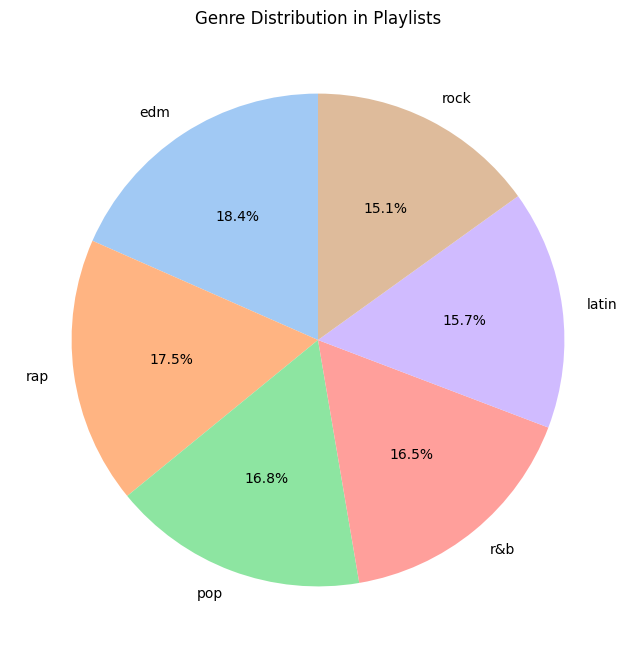

In [ ]:
genre_counts = df['playlist_genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Genre Distribution in Playlists')
plt.show()

### Interpretations
* Genres of the playlists are mostly equally represented

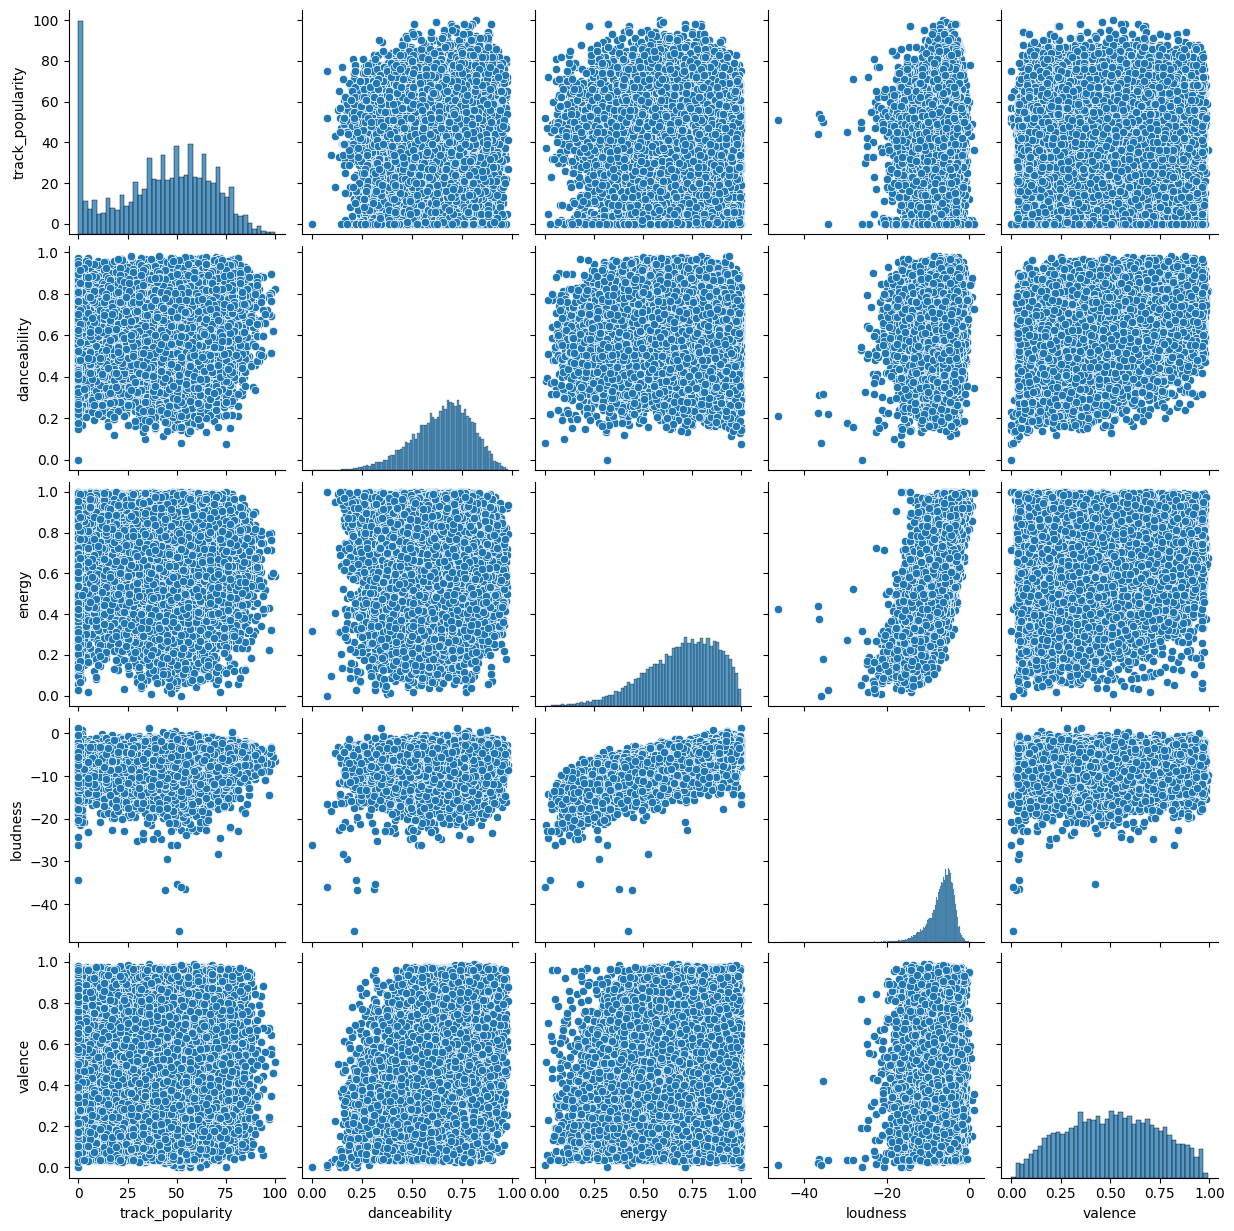

In [ ]:
sns.pairplot(df[['track_popularity', 'danceability', 'energy', 'loudness', 'valence']])
plt.show()

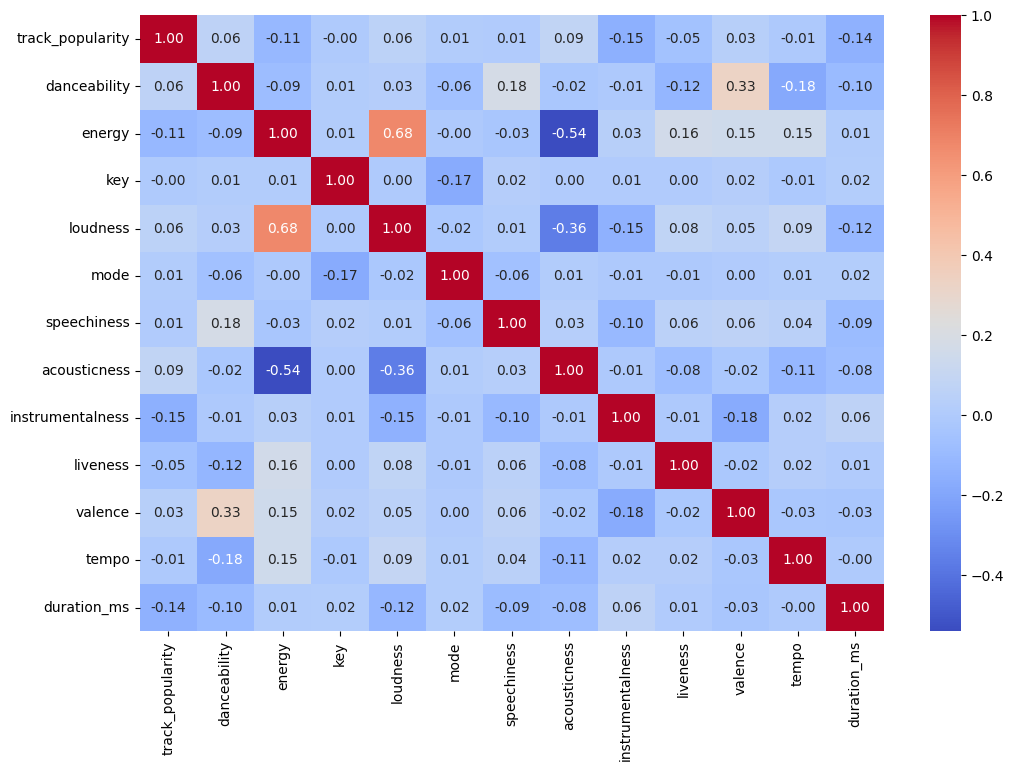

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


### Interpretations
* It looks like track_popularity doesn't have a strong correlation with any of the features given.
* As the loudness of a song increases, the energy of the song is also likely to increase. Conversely, if the loudness decreases, the energy is more likely to decrease.
* With a correlation of -0.14 between track_populariy and duration_ms, there is a weak tendency for longer songs to be associated with slightly lower track popularity on average. However, the relationship is not strong, and other factors may contribute to the overall picture.
* Based on the correlation coefficient of -0.15, there is a weak tendency for songs with higher instrumentalness to be associated with slightly lower track popularity on average. However, the relationship is not strong, and other factors may play a role in determining track popularity.
* Features: energy and acousticness are inversly proportional with a correlation of -0.54. This means that to sing acoustic songs it requires less energy.
* The features: loudness and acousticness have a negative correlation of -0.36.
* Features: danceability and valence have a positive correlation of 0.36.


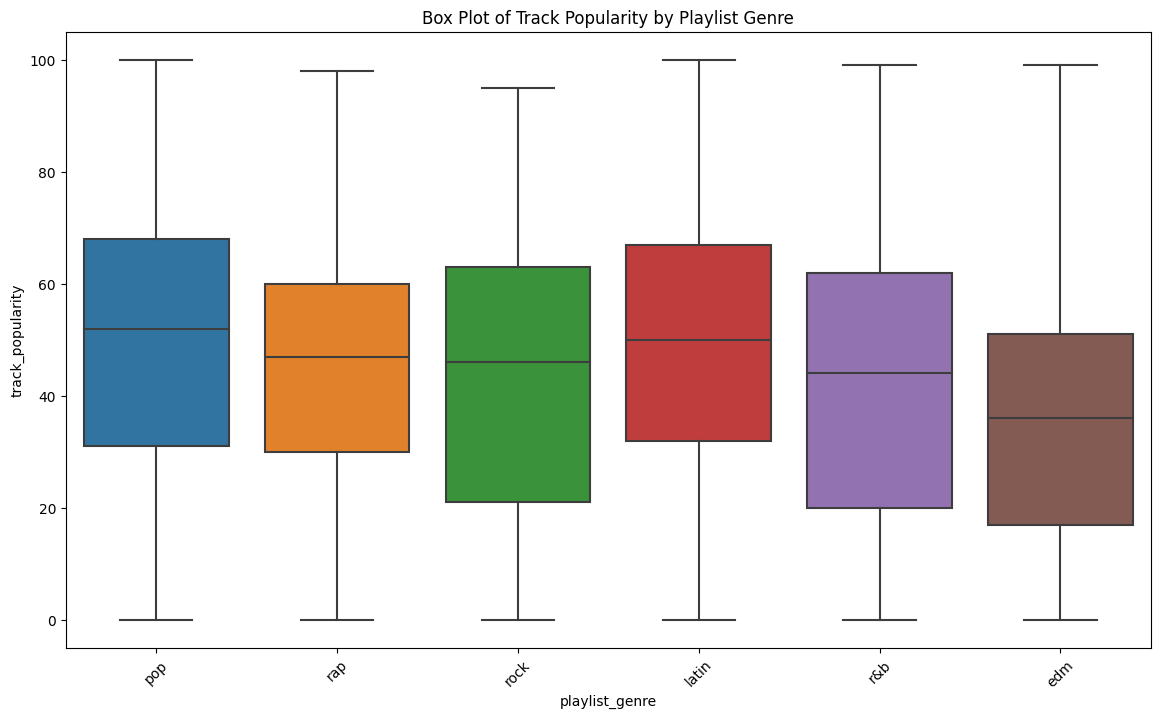

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='playlist_genre', y='track_popularity', data=df)
plt.title('Box Plot of Track Popularity by Playlist Genre')
plt.xticks(rotation=45)
plt.show()

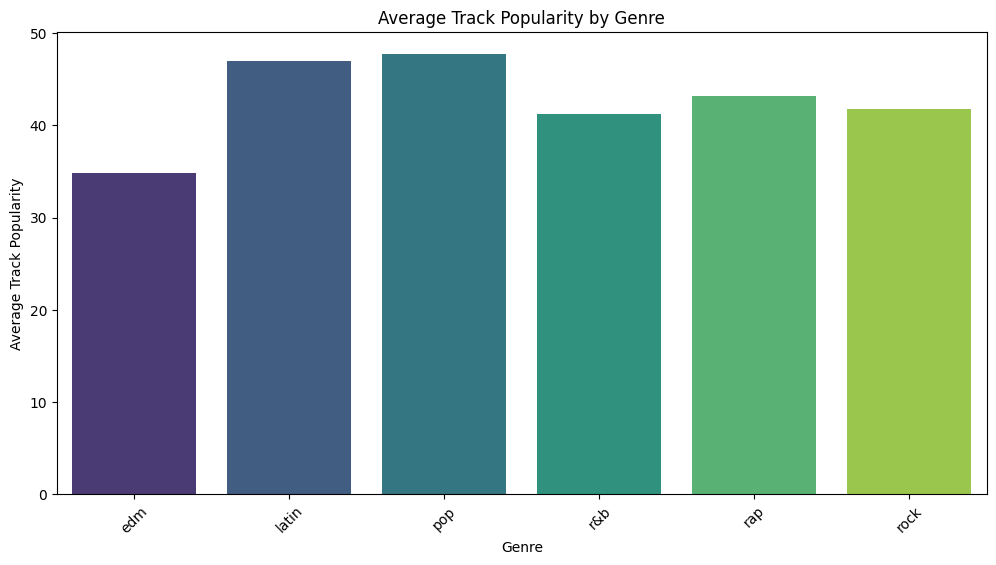

In [ ]:
average_popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='playlist_genre', y='track_popularity', data=average_popularity_by_genre, palette='viridis')
plt.title('Average Track Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Track Popularity')
plt.xticks(rotation=45)
plt.show()

### Interpretations
* Generally pop and latin tracks tend to be more popular
* EDM tends to be the less popular genre

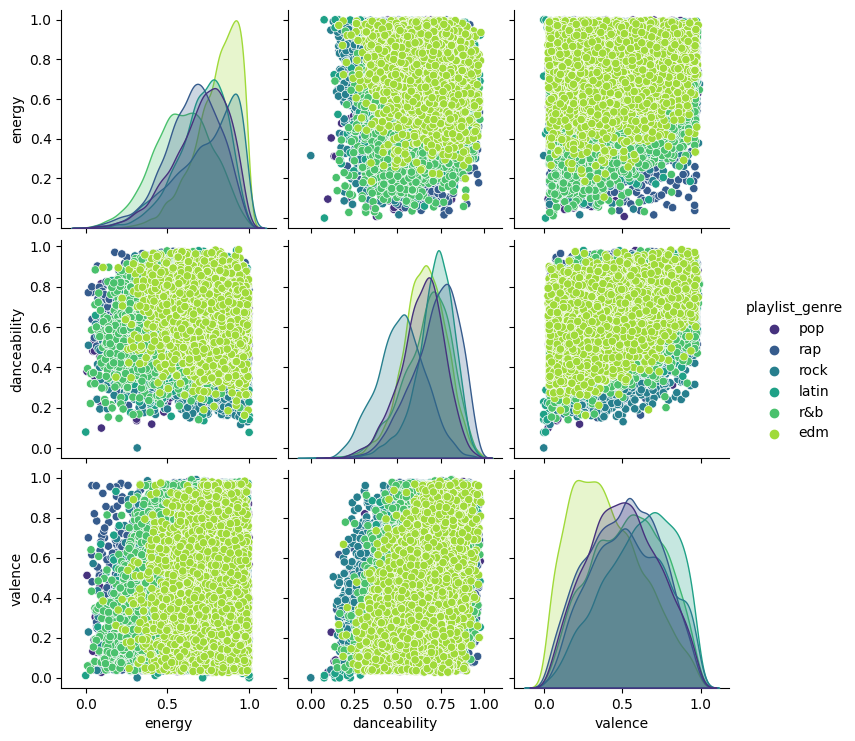

In [ ]:
sns.pairplot(df[['energy', 'danceability', 'valence', 'playlist_genre']], hue='playlist_genre', palette='viridis')
plt.show()

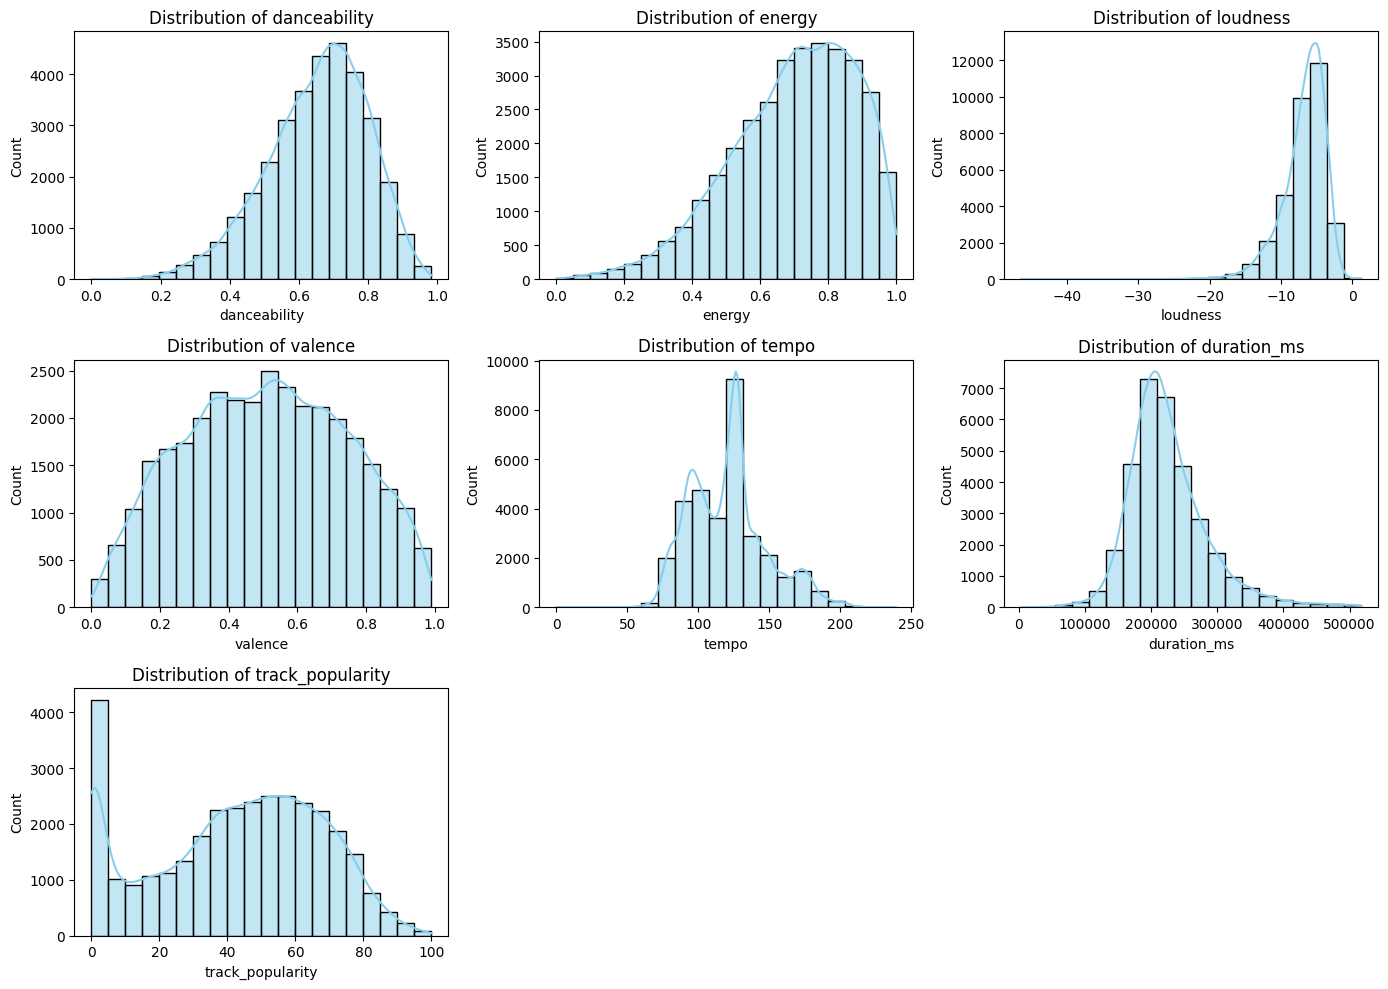

In [ ]:
numeric_cols = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'duration_ms', 'track_popularity']
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

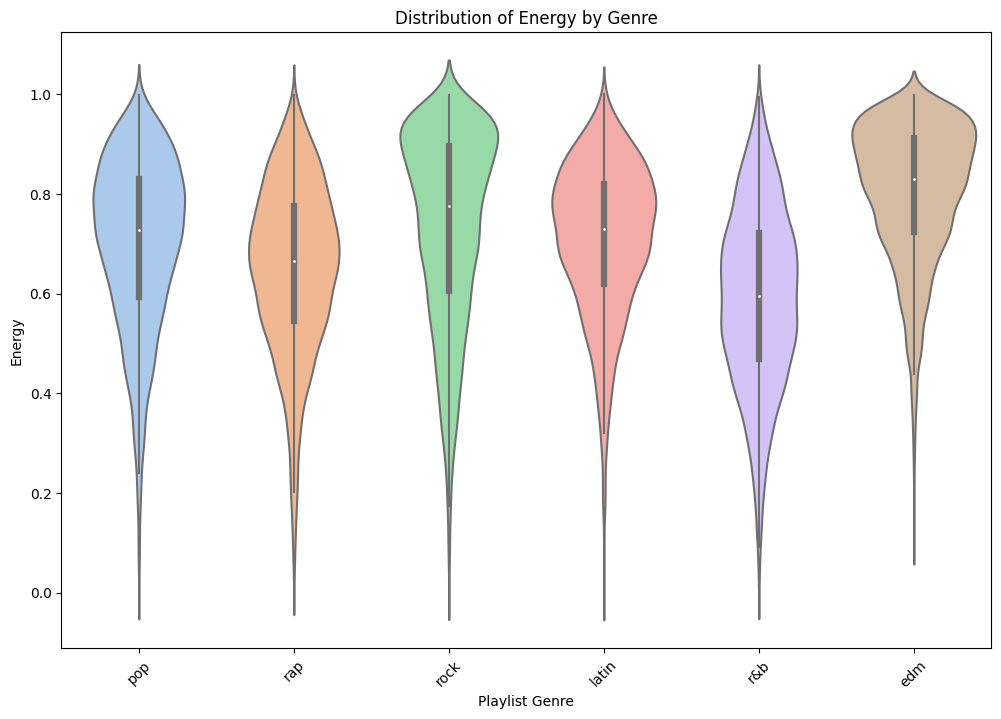

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='playlist_genre', y='energy', data=df, palette='pastel')
plt.title('Distribution of Energy by Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()

### Interpretations
* Rock and edm songs tend to be more energetic
* r&b songs are usually the least energetic

## **Final Analysis**
### Interpretations in the analysis
* The average duration of a song in the dataset is 225799.811622 ms or 3 min and 45 sec
* Rock and edm tend to be more energetic
* r&b songs are usually the least energetic
* Generally pop and latin tracks tend to be more popular
* EDM tends to be the less popular genre
* It looks like track_popularity doesn't have a strong correlation with any of the features given.
* As the loudness of a song increases, the energy of the song is also likely to increase. Conversely, if the loudness decreases, the energy is more likely to decrease.
* With a correlation of -0.14 between track_populariy and duration_ms, there is a weak tendency for longer songs to be associated with slightly lower track popularity on average. However, the relationship is not strong, and other factors may contribute to the overall picture.
* Based on the correlation coefficient of -0.15, there is a weak tendency for songs with higher instrumentalness to be associated with slightly lower track popularity on average. However, the relationship is not strong, and other factors may play a role in determining track popularity.
* Genres of the playlists are mostly equally represented

### Recomendations
* Considering the weak correlations found, further analysis with additional features or external data may be necessary to better understand the factors influencing track popularity.
* To enhance the analysis, exploring external factors such as artist popularity, regional trends could provide more insights into the determinants of track popularity.
* It might be interesting to conduct a more in-depth genre-specific analysis to uncover patterns and characteristics unique to each genre.
* The dataset provides a foundation for building predictive models or machine learning algorithms to predict track popularity based on various features. Additional data and features could be incorporated to improve model accuracy.
* Periodic updates to the dataset could capture evolving trends in music preferences and help in maintaining the relevance of the analysis over time.

### Conclusions
* The dataset provides a comprehensive view of songs across various genres, allowing for a nuanced understanding of their characteristics and popularity.
* The weak correlations suggest that predicting track popularity is likely influenced by a combination of factors beyond the scope of the current dataset.
* This analysis serves as a starting point for music industry professionals, researchers, and enthusiasts interested in exploring trends and patterns in the ever-evolving landscape of music.

## **Feature Engineering**

In feature engineering, we encode the categorical variables and scale the data after splitting into train and test sets.

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder  # Import the LabelEncoder class
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

### Splitting the data into independent and dependent variables

In [ ]:
#dependent variable
y=df['playlist_genre']
y

0        2
1        2
2        2
3        2
4        2
        ..
32828    0
32829    0
32830    0
32831    0
32832    0
Name: playlist_genre, Length: 32833, dtype: int64

In [ ]:
#independent variable
X=df.drop(columns=['playlist_genre'],axis=1)
X.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,24150,8898,2782,66,8225,7614,4315,292,235,3,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,3061,12520,6084,67,17650,10410,4492,292,235,3,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,7219,924,10416,70,3798,985,4335,292,235,3,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,25699,3020,9215,60,5293,2798,4348,292,235,3,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,5987,17910,5402,69,21936,14843,4220,292,235,3,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#0.3 indicates 30% test dataset and remaining 70% training dataset which is ideal size of dataset for ml algorithms training and testing

In [ ]:
X_train

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
31587,11501,4941,7437,4,5774,4433,3525,169,84,18,...,5,-4.615,0,0.0620,0.00137,0.314000,0.4750,0.170,129.948,207865
8460,25010,5183,2271,38,9884,5719,2861,340,337,20,...,7,-6.253,1,0.0265,0.01120,0.000000,0.2860,0.413,84.002,224769
31100,15449,1836,3190,0,1448,1781,2856,141,403,18,...,0,-4.402,1,0.0902,0.00171,0.134000,0.0836,0.186,128.021,185625
733,2476,2459,4690,78,19660,2335,4396,373,128,3,...,0,-2.587,1,0.0506,0.25500,0.000000,0.2500,0.961,157.985,147493
11522,7673,8954,1653,37,21939,13521,1544,16,34,0,...,11,-8.993,1,0.0675,0.01450,0.022200,0.2790,0.797,124.916,343400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,27434,22458,6842,50,1144,19049,3934,418,449,11,...,9,-3.803,0,0.0699,0.00217,0.000396,0.3410,0.677,180.033,172128
32103,25536,11656,1647,43,7223,9661,4256,134,309,18,...,1,-4.494,1,0.1680,0.04960,0.000044,0.0986,0.328,149.857,156800
30403,25292,12058,8306,57,22170,10009,3878,4,103,16,...,2,-3.476,1,0.1770,0.00600,0.000003,0.1690,0.611,98.019,199945
21243,9883,22838,68,84,6453,19244,3977,327,26,11,...,7,-5.114,0,0.4630,0.01690,0.000000,0.1240,0.152,120.274,203418


### Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

## **Model Building, Training, Testing and comparing actual vs predicted values**

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import the DecisionTreeClassifier class
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class classification
recall = recall_score(y_test, y_pred, average='weighted')  # For multi-class classification
f1 = f1_score(y_test, y_pred, average='weighted')  # For multi-class classification


# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9984771573604061
Precision: 0.9984791791265867
Recall: 0.9984771573604061
F1-score: 0.9984763933613913


In [ ]:
from sklearn.tree import plot_tree  # Import plot_tree
# Create a confusion matrix:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1827    0    7    0    0    5]
 [   0 1543    0    0    0    0]
 [   2    0 1639    0    0    0]
 [   0    0    0 1614    0    0]
 [   0    0    0    0 1725    0]
 [   1    0    0    0    0 1487]]


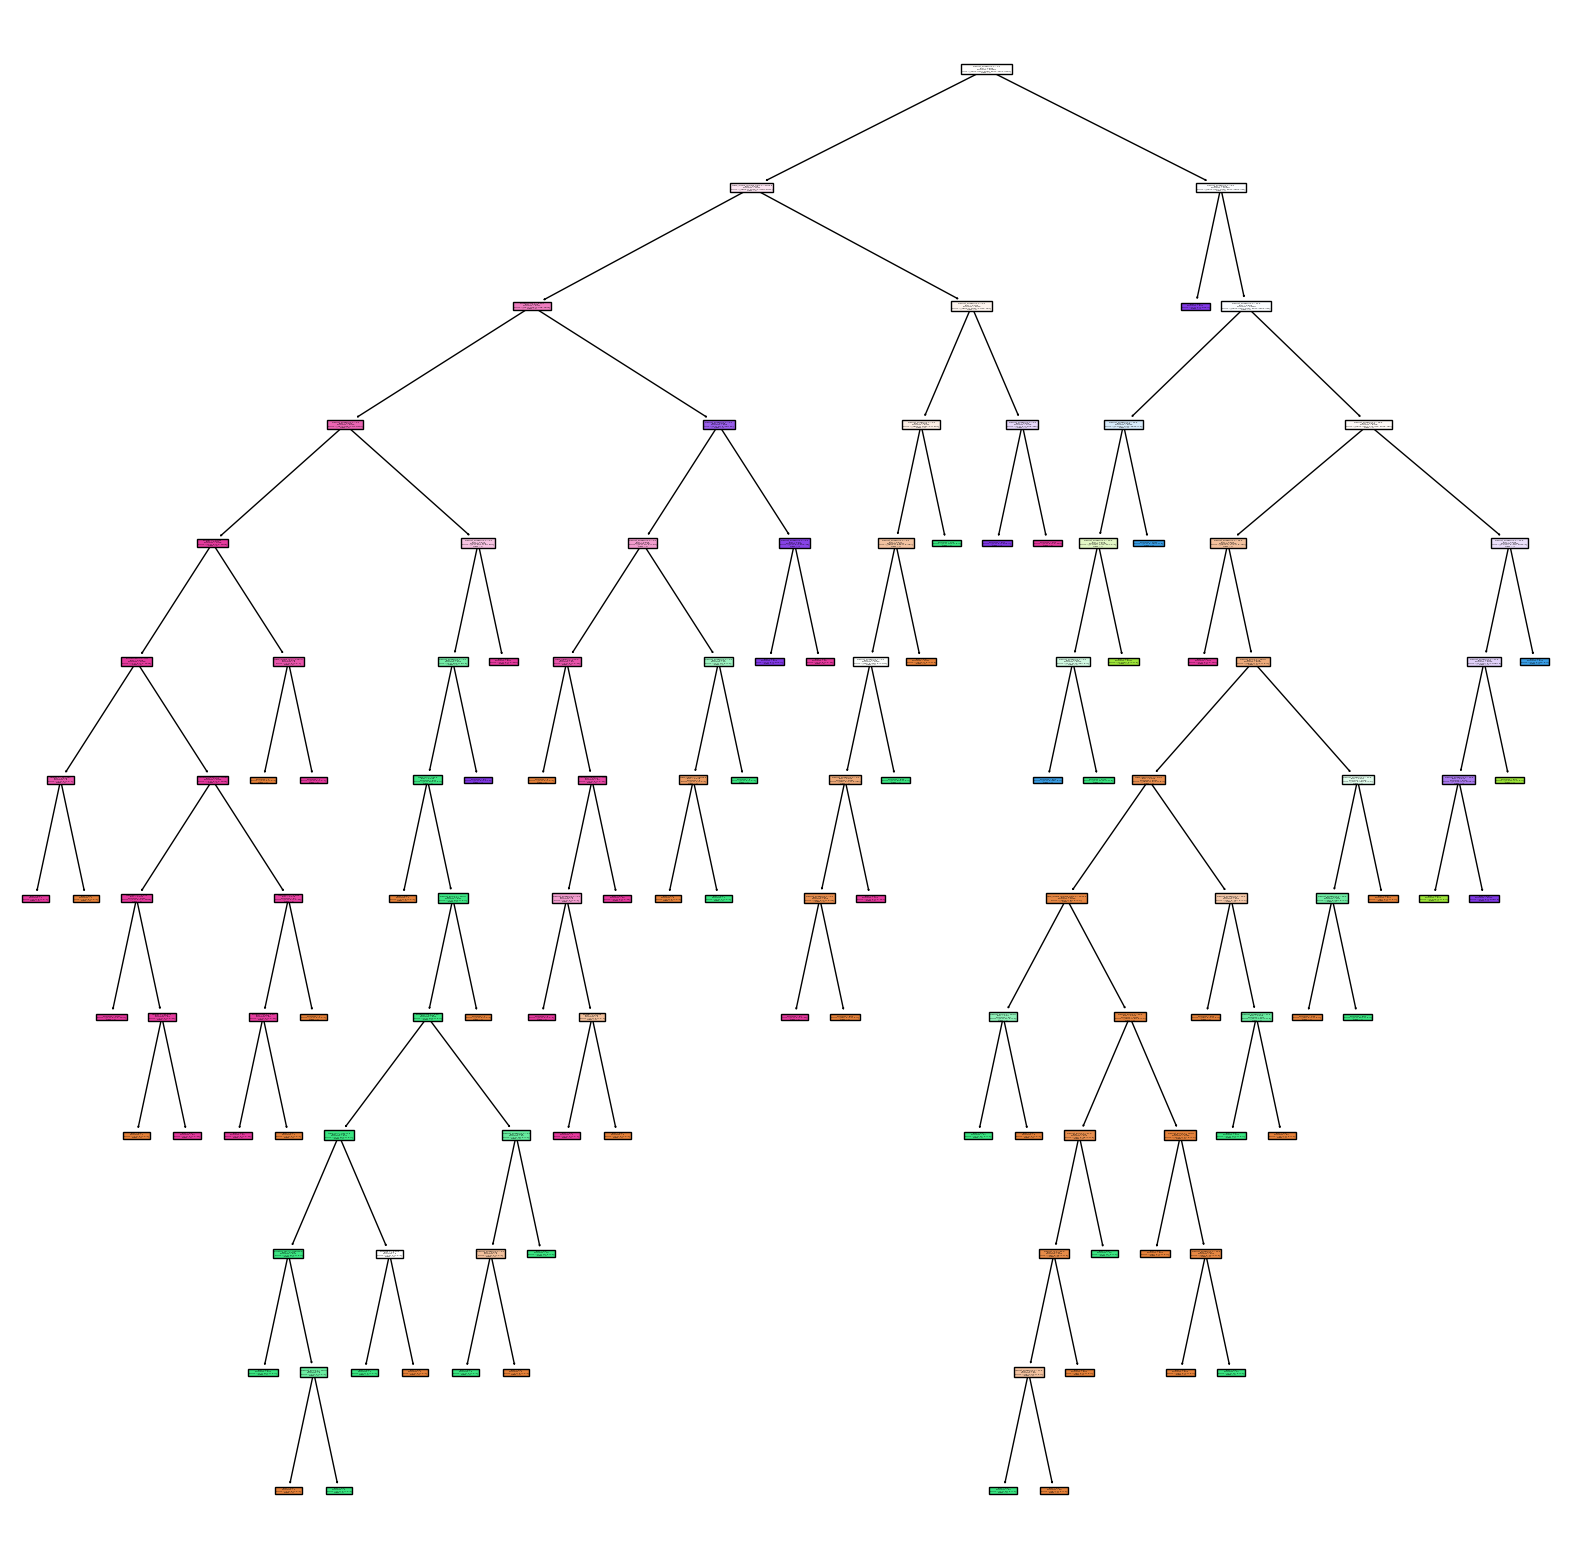

In [ ]:
# Visualize the decision tree:
dt_model.classes_ = dt_model.classes_.astype(str)
# Create the plot with adjusted figure size
fig, ax = plt.subplots(figsize=(20, 20))  # Set desired width and height (in inches)

plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=dt_model.classes_, ax=ax)
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

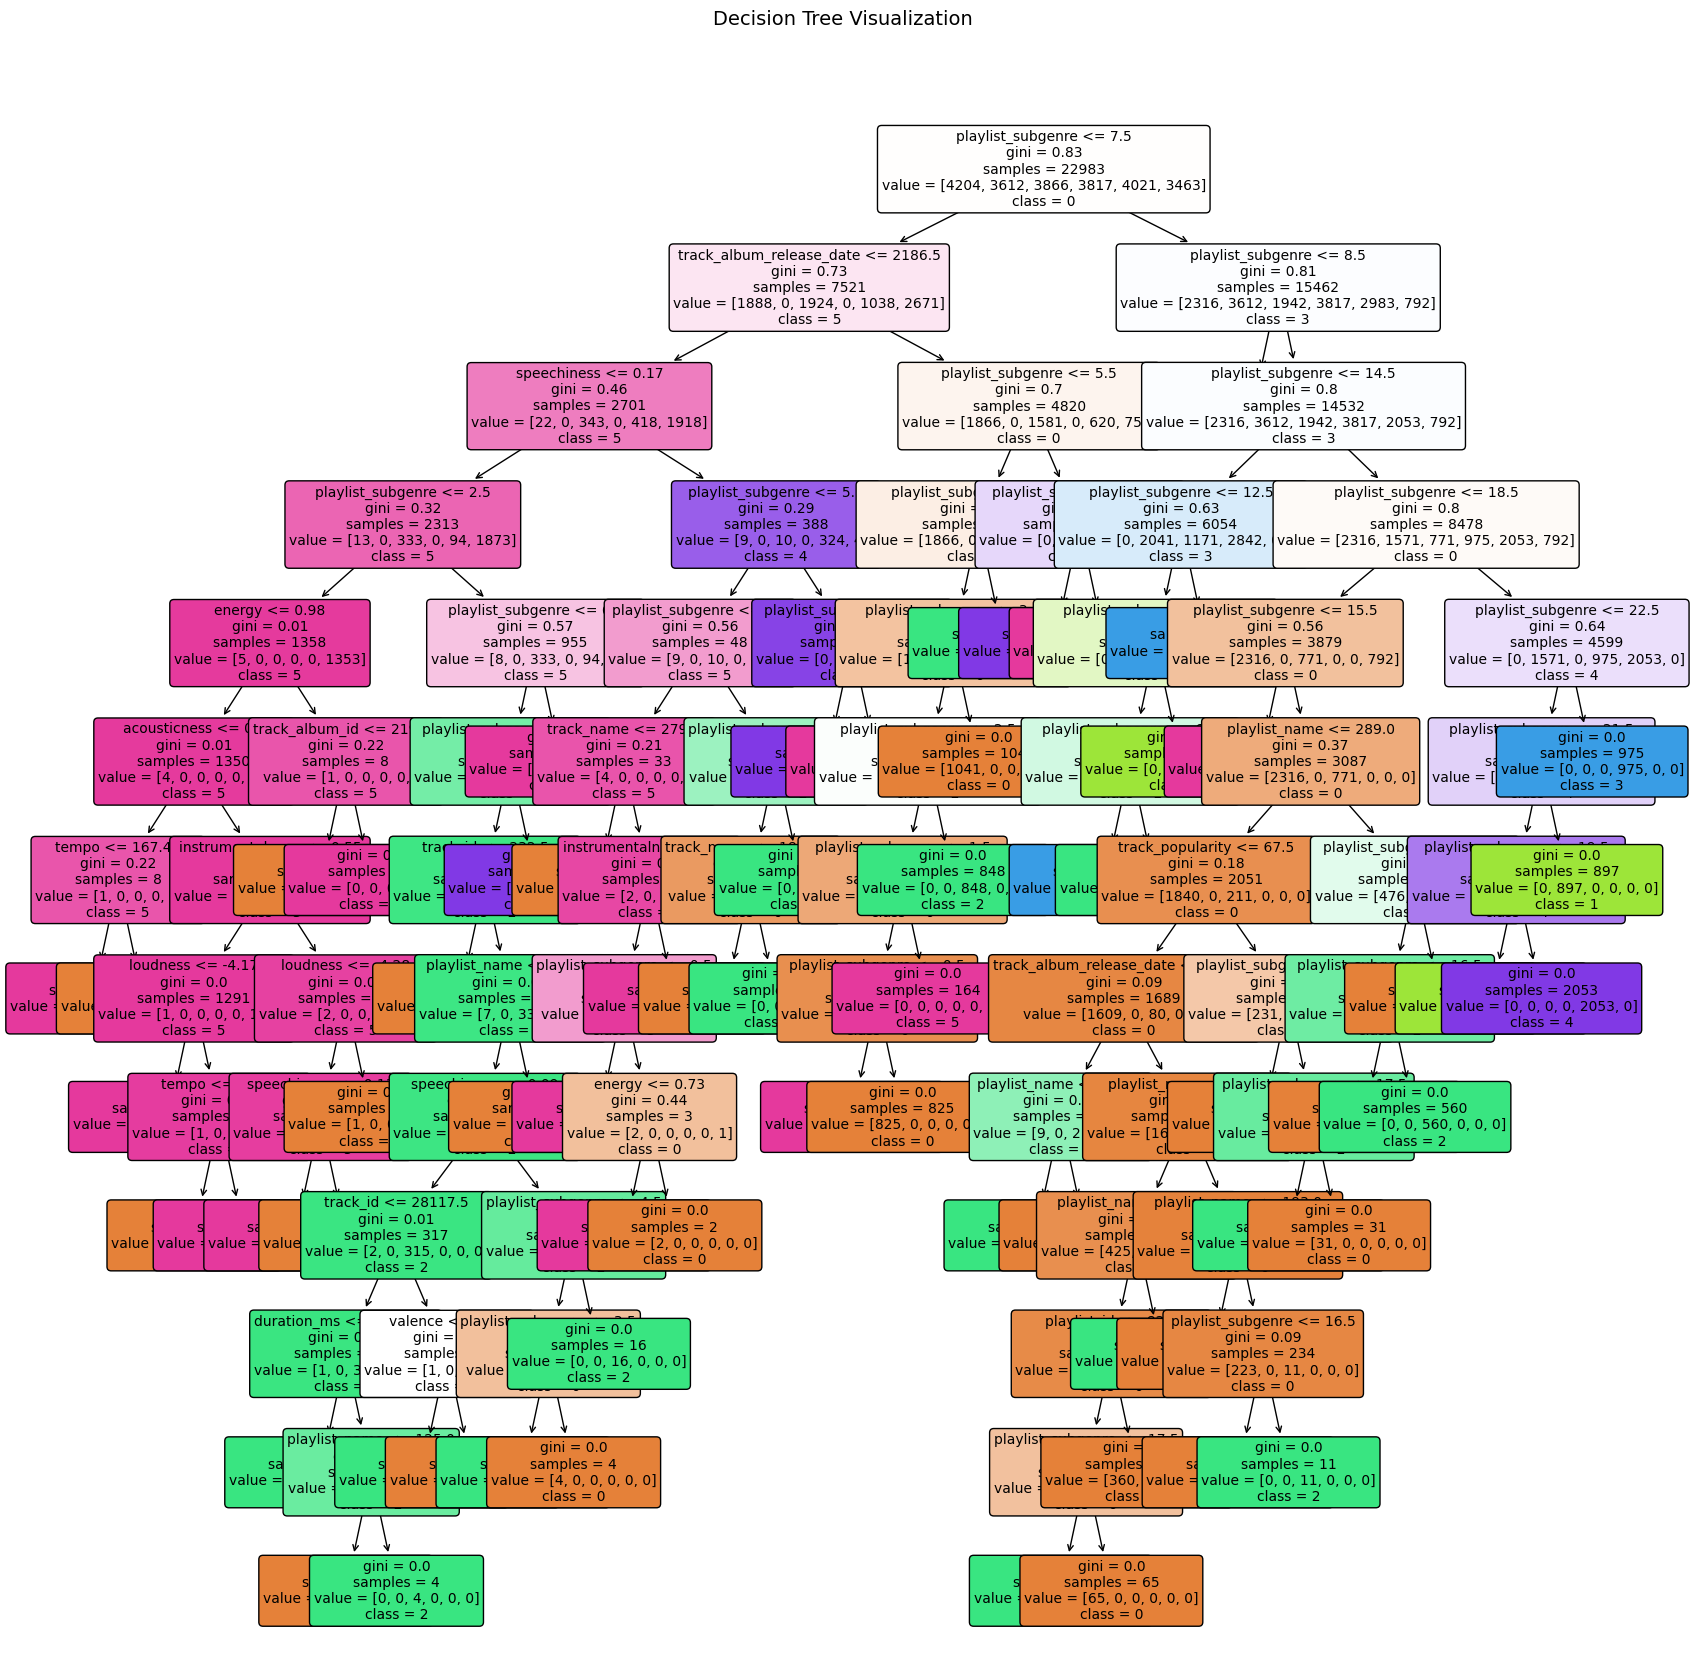

In [ ]:
# Create a larger figure with tighter layout
fig, ax = plt.subplots(figsize=(20, 20))  # Increase figure size

# Customize plot appearance for better readability
plot_tree(
    dt_model,
    filled=True,
    feature_names=X_train.columns,
    class_names=dt_model.classes_,
    ax=ax,
    fontsize=10,  # Adjust font size for nodes
    rounded=True,  # Use rounded edges for nodes
    precision=2,  # Limit displayed values to 2 decimal places
)

# Improve text alignment for better clarity
plt.title("Decision Tree Visualization", fontsize=14, y=1.05)  # Adjust title position
plt.xlabel("Feature Name", fontsize=12)
plt.ylabel("Class", fontsize=12)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha="right")


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create an SVM model
svm_model = SVC(kernel="linear")  # Try different kernels (e.g., "rbf", "poly") for non-linear problems

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_predi = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_predi)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [ ]:
# Create a confusion matrix:
cm = confusion_matrix(y_test, y_predi)
print("Confusion Matrix:\n", cm)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_predic = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predic)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9868020304568528
Precision: 0.9984791791265867
Recall: 0.9984771573604061
F1-score: 0.9984763933613913
